In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [57]:
# Функция расчета RSSI

def calculate_rssi(sensor_pos, point_pos):
    rssi_0 = -40
    n = 3
    distance = np.linalg.norm(np.array(sensor_pos) - np.array(point_pos))
    
    return rssi_0 if distance == 0 else rssi_0 - 10 * n * np.log10(distance)

In [58]:
# Генерация данных

def generator(
        num_points: int,
        room_size: int,
        sensor_positions: list[tuple[int, int]]
) -> pd.DataFrame:
    '''
    num_points - количество точек внутри комнаты;

    room_size - размер комнаты (м);

    sensor_positions - координаты сенсоров;
    '''
    
    x = np.random.uniform(0, room_size, num_points)
    y = np.random.uniform(0, room_size, num_points)
    
    grid_points = list(zip(x, y))

    data = []
    for point in grid_points:
        rssi_values = [calculate_rssi(sensor_pos, point) for sensor_pos in sensor_positions]
        avg_rssi = np.mean(rssi_values)
        data.append([point[0], point[1], *rssi_values, avg_rssi])

    columns = ['x', 'y'] + [f'RSSI_Sensor_{i+1}' for i in range(len(sensor_positions))] + ['Avg_RSSI']
    df = pd.DataFrame(data, columns=columns)

    return df

In [59]:
def visual(df: pd.DataFrame, sensor_positions: list[tuple[int, int]]):
    # Визуализация
    plt.figure(figsize=(8, 6))

    # Тепловая карта сигнала (RSSI)
    plt.scatter(df['x'], df['y'], c=df['Avg_RSSI'], cmap='plasma', s=50, label='Grid Points')
    plt.colorbar(label='RSSI (dBm)')

    # Датчики
    for sensor in sensor_positions:
        plt.scatter(sensor[0], sensor[1], color='lime', edgecolor='black', s=200, marker='^', label='Sensor')

    # Настройки графика
    plt.title('Signal Visualization')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.grid(True, alpha=0.2)
    
    # Отображение
    plt.show()

In [166]:
# Генерация датчиков

def get_sensor_positions(n: int, num_sensors: int) -> list[tuple[int, int]]:
    possible_positions = []
    
    # Верхняя и нижняя стены
    for i in range(n):
        possible_positions.append((0, i))  # Верхняя стена
        possible_positions.append((n, i))  # Нижняя стена
    
    # Левая и правая стены (исключая углы, которые уже учтены)
    for i in range(1, n-1):
        possible_positions.append((i, 0))  # Левая стена
        possible_positions.append((i, n))  # Правая стена
    
    if num_sensors > len(possible_positions):
        raise ValueError(f"Запрошено {num_sensors} датчиков, но доступно только {len(possible_positions)} позиций на стенах")
    
    sensor_positions = random.sample(possible_positions, num_sensors)
    return sensor_positions


[(2, 4), (0, 3), (4, 0), (4, 3), (2, 0), (4, 2), (4, 1), (0, 2), (1, 0), (0, 0)]


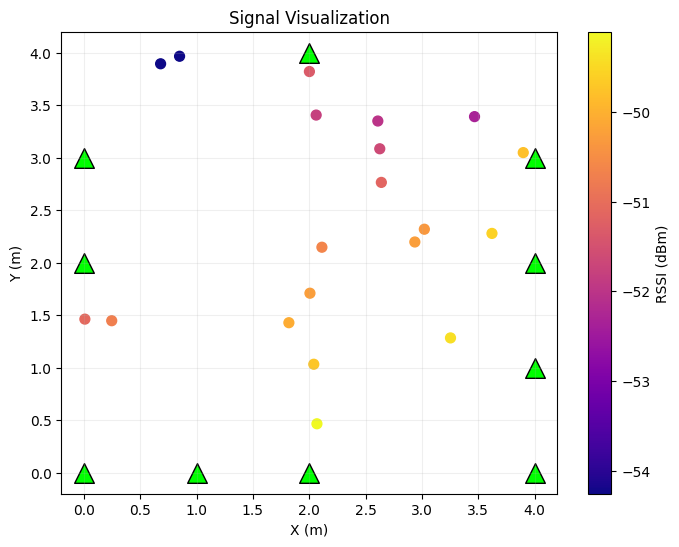

,x,y,RSSI_Sensor_1,RSSI_Sensor_2,RSSI_Sensor_3,RSSI_Sensor_4,RSSI_Sensor_5,RSSI_Sensor_6,RSSI_Sensor_7,RSSI_Sensor_8,RSSI_Sensor_9,RSSI_Sensor_10,Avg_RSSI
0,3.898147,3.048803,-49.809379,-57.726766,-54.531146,-11.585619,-56.657916,-40.681965,-49.361085,-58.181029,-58.717557,-60.835030,-49.808749
1,2.936363,2.197496,-49.232618,-54.503553,-51.629034,-43.739213,-51.344705,-41.024617,-46.137123,-54.063694,-54.001161,-56.931422,-50.260714
2,2.625288,3.085215,-41.337010,-52.582171,-55.858360,-44.171331,-54.940799,-47.301816,-51.925630,-53.602966,-56.274063,-58.226902,-51.622105
3,3.020791,2.319049,-48.811642,-54.726513,-52.028088,-42.295991,-52.113026,-40.383536,-46.467416,-54.475886,-54.639457,-57.421941,-50.336350
4,3.252769,1.283973,-54.274602,-56.967181,-45.156862,-48.166794,-47.613823,-40.447142,-37.082465,-55.675852,-52.413983,-56.310912,-49.410962
5,2.608092,3.349585,-38.487586,-52.605690,-56.787416,-44.706796,-55.960968,-48.625715,-53.089298,-54.035273,-57.100867,-58.836996,-52.023661
6,3.620590,2.279125,-51.208520,-57.016640,-50.911124,-37.328715,-53.398705,-30.191276,-43.756717,-56.801983,-56.221238,-58.937864,-49.577278
7,2.005952,1.709649,-50.797107,-51.325365,-52.581913,-51.270613,-46.987286,-49.128745,-49.768923,-49.204688,-48.923902,-52.626716,-50.261526
8,1.819074,1.428639,-52.337065,-51.426894,-52.485189,-52.883123,-44.751325,-50.591665,-50.406130,-48.408431,-46.499082,-50.925352,-50.071426
9,2.639253,2.764954,-44.296791,-52.695896,-54.663524,-44.204845,-53.589863,-45.802262,-50.441012,-53.169905,-55.212843,-57.470033,-51.154697


In [182]:
num_points = 20
room_size = 4
num_sensors = 10
sensor_positions = get_sensor_positions(room_size, num_sensors)
# sensor_positions = [(0, 2), (2, 0), (2, 4), (4, 2)]

print(sensor_positions)

df = generator(num_points=num_points, room_size=room_size, sensor_positions=sensor_positions)
visual(df=df, sensor_positions=sensor_positions)
df

In [61]:
print(df)

           x         y  RSSI_Sensor_1  RSSI_Sensor_2  RSSI_Sensor_3  \
0   3.181547  3.160760     -55.893227     -55.845828     -44.571324   
1   3.719711  3.889648     -58.610866     -58.860415     -48.433202   
2   1.788802  2.196777     -47.655225     -50.313513     -50.390217   
3   2.366646  1.575918     -51.429888     -46.269413     -46.817389   
4   2.566271  0.593511     -53.990118     -37.419439     -49.085697   
5   3.683363  0.077271     -58.557140     -46.799042     -48.691862   
6   0.987040  3.054873     -44.792850     -55.229349     -55.123050   
7   3.510783  2.744248     -56.648486     -54.877269     -38.491063   
8   3.175143  0.044122     -57.148498     -42.111898     -49.806648   
9   1.861428  2.679281     -48.909812     -52.857949     -50.529879   
10  0.653494  0.449525     -46.779161     -44.564615     -57.004557   
11  2.733587  0.805979     -54.239520     -41.120889     -47.220537   
12  3.682350  3.327523     -57.779739     -57.146493     -44.053962   
13  2.